In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()
print(train_set_x_orig.shape)
print(train_set_y_orig)
print(test_set_x_orig.shape)
print(test_set_y_orig.shape)
print(classes[1])

(209, 64, 64, 3)
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
(50, 64, 64, 3)
(1, 50)
b'cat'


1


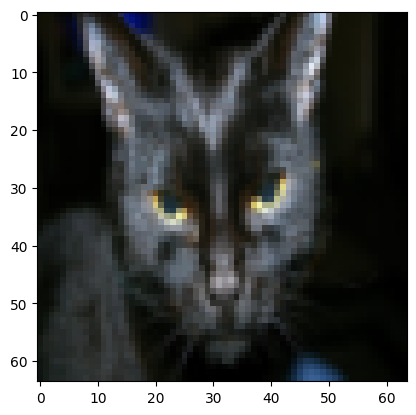

In [3]:
index = 25
plt.imshow(train_set_x_orig[index])
print(train_set_y_orig[0,index])

In [4]:
num_train = train_set_x_orig.shape[0]
num_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print(f"num_train:{num_train}")
print(f"num_test:{num_test}")
print(f"num_px:{num_px}")

num_train:209
num_test:50
num_px:64


In [5]:
train_set_x_flatten = train_set_x_orig.reshape(num_train,-1).T
test_set_x_flatten = test_set_x_orig.reshape(num_test,-1).T
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [6]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [7]:
def sigmoid(z):
    s = 1 / (1+np.exp(-z))
    return s

In [8]:
def init_w_b(size):
    w = np.zeros((size, 1))
    b = 0
    
    assert(w.shape == (size, 1))
    
    return w, b

In [9]:
def propagate(w, b, train_set_x, train_set_y_orig, num_train):
    z = np.dot(w.T, train_set_x) + b
    a = sigmoid(z)

    J = (1 / num_train) * (np.sum(-train_set_y_orig * np.log(a) - (1-train_set_y_orig) * np.log(1-a)))

    dz = a - train_set_y_orig
    dw = (1 / num_train) * np.dot(train_set_x, dz.T)
    db = (1 / num_train) * np.sum(dz)
    
    return J, dw, db

In [10]:
def predict(w, b, train_set_x):
    z = np.dot(w.T, train_set_x) + b
    a = sigmoid(z)

    for i in range(a.shape[1]):
        a[0,i] = 1 if a[0,i] >0.5 else 0

    return a

In [11]:
learning_rate = 0.005
w, b = init_w_b(train_set_x.shape[0])
costs = []
for i in range(2500):
    J, dw, db = propagate(w, b, train_set_x, train_set_y_orig, num_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db 
    
    if i % 100 == 0:
        costs.append(J)
        print(f"迭代次数：{i}, 误差值：{J}")

y_predict_train = predict(w, b, train_set_x)
y_predict_test = predict(w, b, test_set_x)

print(f"训练集准确率：{100*(num_train-np.sum(np.abs(y_predict_train-train_set_y_orig)))/num_train}" + "%")
print(f"测试集准确率：{100*(num_test-np.sum(np.abs(y_predict_test-test_set_y_orig)))/num_test}" + "%")

迭代次数：0, 误差值：0.6931471805599453
迭代次数：100, 误差值：0.5845083636993087
迭代次数：200, 误差值：0.4669490409465546
迭代次数：300, 误差值：0.37600686694802077
迭代次数：400, 误差值：0.3314632893282512
迭代次数：500, 误差值：0.30327306747438293
迭代次数：600, 误差值：0.27987958658260487
迭代次数：700, 误差值：0.2600421369258757
迭代次数：800, 误差值：0.2429406846779662
迭代次数：900, 误差值：0.22800422256726066
迭代次数：1000, 误差值：0.2148195137844964
迭代次数：1100, 误差值：0.20307819060644985
迭代次数：1200, 误差值：0.19254427716706862
迭代次数：1300, 误差值：0.1830333379688351
迭代次数：1400, 误差值：0.17439859438448874
迭代次数：1500, 误差值：0.16652139705400332
迭代次数：1600, 误差值：0.15930451829756614
迭代次数：1700, 误差值：0.15266732471296504
迭代次数：1800, 误差值：0.1465422350398234
迭代次数：1900, 误差值：0.1408720757031016
迭代次数：2000, 误差值：0.13560807525912016
迭代次数：2100, 误差值：0.1307083213047731
迭代次数：2200, 误差值：0.12613655733642845
迭代次数：2300, 误差值：0.12186123310162926
迭代次数：2400, 误差值：0.11785474652704071
训练集准确率：99.52153110047847%
测试集准确率：68.0%


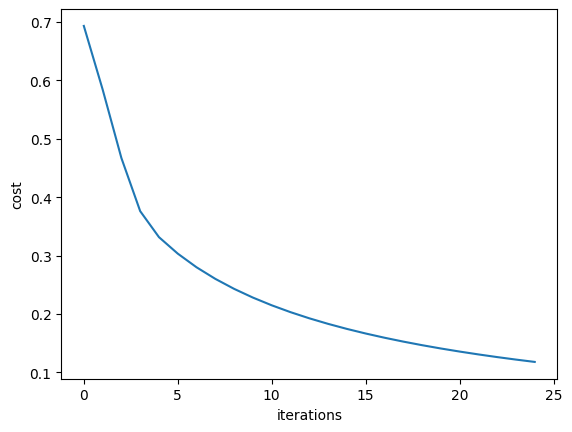

In [12]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()